## Introduction: Manual Feature Engineering
Source: https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering

We will use information from `bureau` and `bureau_balance` data:
+ bureau: clients' previous loans with other finalcial institutions reported to Home Credit.
+ bureau_balance: monthly information about previous loan.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

### Example: Counts of clients' previous loans

We will use the count of client's previous loans at other finalcial institutions as an example to illustrate the general process of manual feature engineering.<br>
The Pandas operations will be used:
- `groupby`: group a dataframe by column. In this case we will group by the unique client, the `SK_ID_CURR` column.
- `agg`: perform a calculation the a grouped data, such as calculating mean of the column.
- `merge`: match the aggregated statistic to the appropriate client. We need to merge the original training data with the calculates stats on the `SK_ID_CURR` which will insert `NaN` in any cells for which the client does not have corresponding stats.

In [2]:
# Read training data
train = pd.read_csv('./data/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Read in bureau 
bureau = pd.read_csv('./data/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
# Group the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby(
    ['SK_ID_CURR'], 
    as_index=False
)['SK_ID_BUREAU'].count().rename(columns = {
    'SK_ID_BUREAU': 'previous_loan_counts'
})

previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [5]:
# join previous loan counts with training data
train = train.merge(previous_loan_counts, on='SK_ID_CURR', how='left')

# filling missing values with zero
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Accessing usefulness of New Feature with r-value

We use **Pearson Correlation (r-value)** between new variable and target to determine if it is useful. The measures the strength of a linear relationship between two variables with ranges from -1 to +1:
+ -1: perfectly negatively linear.
+ +1: perfective positive linear.

The `r-value` is **NOT** the best measure of the "usefulness" of new variable, but it can give a first approximation of whether a variable will be helpful to a ML model

#### Kernel Density Estimate Plot

The **Kernel Density Estimate - KDE** plot shows the distribution of a single variable. To observe the different in distribution dependent on a value of a categorical variable, we can color the distribution defferently according to the category.

In [6]:
# plots the distribution of a variable colored by value of the target
def kde_target(var_name, df):
    """
    plot the distribution of variable colored by values of the target
    """
    # calculate the correlation coefficient between variable and target
    corr = df['TARGET'].corr(df[var_name])
    
    # calculate the median for repaid vs non-repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_non_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize=(10, 5))
    
    # plot distribution for target = 0 and target = 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name].dropna(), label='TARGET = 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name].dropna(), label='TARGET = 1')
    
    # label the plot
    plt.xlabel(var_name)
    plt.ylabel("Density")
    plt.title("%s distribution" % var_name)
    plt.legend()
    
    # print out the correlation
    print("The correlation between %s and TARGET: %0.4f" % (var_name, corr))
    print("Media value for loan that was repaid: %0.4f" % avg_repaid)
    print("Media value for loan that was NOT repaid: %0.4f" % avg_non_repaid)

The correlation between EXT_SOURCE_3 and TARGET: -0.1789
Media value for loan that was repaid: 0.5460
Media value for loan that was NOT repaid: 0.3791


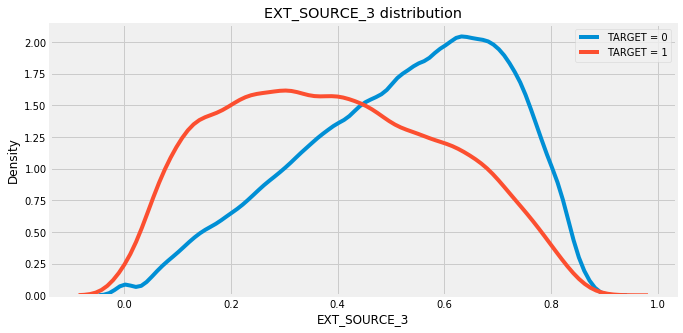

In [7]:
# Test function with EXT_SOURCE_3
kde_target('EXT_SOURCE_3', train)

The correlation between previous_loan_counts and TARGET: -0.0100
Media value for loan that was repaid: 4.0000
Media value for loan that was NOT repaid: 3.0000


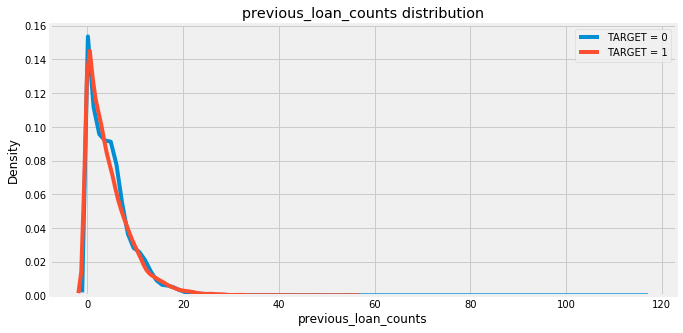

In [8]:
# Test function with new variable previous_loan_count
kde_target('previous_loan_counts', train)

From this, it is difficult to tell if this variable will be important. The correlation coefficient is extremely weak (-0.01) and there is almost no noticeable defference in the distribution.

#### Aggregating Numeric Columns

In [9]:
# compute statistics for all numeric columns
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index=False).agg(['min', 'max', 'mean', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                         CREDIT_DAY_OVERDUE           \
                     min  max         mean   sum                min max mean   
0     100001       -1572  -49  -735.000000 -5145                  0   0  0.0   
1     100002       -1437 -103  -874.000000 -6992                  0   0  0.0   
2     100003       -2586 -606 -1400.750000 -5603                  0   0  0.0   
3     100004       -1326 -408  -867.000000 -1734                  0   0  0.0   
4     100005        -373  -62  -190.666667  -572                  0   0  0.0   

      DAYS_CREDIT_ENDDATE   ...    AMT_CREDIT_SUM_OVERDUE       \
  sum                 min   ...                      mean  sum   
0   0             -1329.0   ...                       0.0  0.0   
1   0             -1072.0   ...                       0.0  0.0   
2   0             -2434.0   ...                       0.0  0.0   
3   0              -595.0   ...                       0.0  0.0   
4   0              -128.0   ...                       0.0  0.0   

  DAYS_CREDIT_UPDATE                        AMT_ANNUITY                        \
                 min  max        mean   sum         min      max         mean   
0               -155   -6  -93.142857  -652         0.0  10822.5  3545.357143   
1              -1185   -7 -499.875000 -3999         0.0      0.0     0.000000   
2              -2131  -43 -816.000000 -3264         NaN      NaN          NaN   
3               -682 -382 -532.000000 -1064         NaN      NaN          NaN   
4               -121  -11  -54.333333  -163         0.0   4261.5  1420.500000   

            
       sum  
0  24817.5  
1      0.0  
2      0.0  
3      0.0  
4   4261.5  

[5 rows x 49 columns]

Creating new name for each column by appending the stat to the name ==> Reduce from multi-level index to single level.

In [10]:
# list of column names
columns = ['SK_ID_CURR']

# iterate through the variable names
for var in bureau_agg.columns.levels[0]:
    if var != 'SK_ID_CURR': # skip the id name
        # iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # make a new column name
            columns.append('bureau_%s_%s' % (var, stat))

In [11]:
# rename column names of bureau_agg dataframe
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_min,...,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum
0,100001,-1572,-49,-735.000000,-5145,0,0,0.0,0,-1329.0,...,0.0,0.0,-155,-6,-93.142857,-652,0.0,10822.5,3545.357143,24817.5
1,100002,-1437,-103,-874.000000,-6992,0,0,0.0,0,-1072.0,...,0.0,0.0,-1185,-7,-499.875000,-3999,0.0,0.0,0.000000,0.0
2,100003,-2586,-606,-1400.750000,-5603,0,0,0.0,0,-2434.0,...,0.0,0.0,-2131,-43,-816.000000,-3264,NaN,NaN,NaN,0.0
3,100004,-1326,-408,-867.000000,-1734,0,0,0.0,0,-595.0,...,0.0,0.0,-682,-382,-532.000000,-1064,NaN,NaN,NaN,0.0
4,100005,-373,-62,-190.666667,-572,0,0,0.0,0,-128.0,...,0.0,0.0,-121,-11,-54.333333,-163,0.0,4261.5,1420.500000,4261.5


In [12]:
# merge with training data
train = train.merge(bureau_agg, on ='SK_ID_CURR', how='left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,-1185.0,-7.0,-499.875,-3999.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,-2131.0,-43.0,-816.000,-3264.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-682.0,-382.0,-532.000,-1064.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-783.0,-783.0,-783.000,-783.0,NaN,NaN,NaN,0.0


#### Correlations of Aggregated columns with TARGET

In [13]:
# list of new correlations
new_corrs = []

# iterate through the columns
for col in columns:
    # calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    
    # append to the list as a tuple
    new_corrs.append((col, corr))
    
new_corrs[:10]

[('SK_ID_CURR', -0.0021084690181977185),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010387),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997315),
 ('bureau_DAYS_CREDIT_mean', 0.08972896721998128),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484674),
 ('bureau_CREDIT_DAY_OVERDUE_min', 0.007573067345301671),
 ('bureau_CREDIT_DAY_OVERDUE_max', 0.005492626487774607),
 ('bureau_CREDIT_DAY_OVERDUE_mean', 0.008118453706602058),
 ('bureau_CREDIT_DAY_OVERDUE_sum', 0.0062982607264991655),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616135)]

In [14]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse=True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998128),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010387),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968676),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392032),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102058),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758576),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997315),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111597),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483549),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.04286392247073026),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484674),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306008),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03658963469632919),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616135),
 ('bureau_DAYS_CREDIT_UPDATE_max', 0.028233546896535903)]

None of new variables have a significant correlation with the TARGET. We can look at the KDE of the highest correlated variable `bureau_DAYS_CREDIT_mean`

The correlation between bureau_DAYS_CREDIT_mean and TARGET: 0.0897
Media value for loan that was repaid: -1067.0000
Media value for loan that was NOT repaid: -835.3333


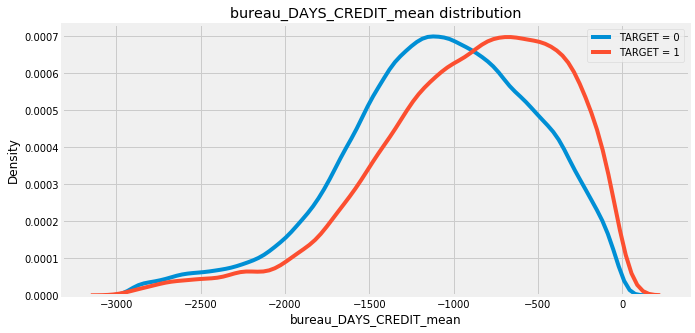

In [15]:
kde_target('bureau_DAYS_CREDIT_mean', train)

#### Function for Numeric Aggregation

In [16]:
def agg_numeric(df, group_var, df_name):
    """
    Aggregate the numeric values in a dataframe. 
    This can be used to create features for each instance of the grouping variable.
    Args:
        df (dataframe): the dataframe to calculate the statistics on.
        group_var (string): the variable by which to group off.
        df_name (string): the variable used to rename the columns
    Returns:
        agg (dataframe): a dataframe with the statistics aggregated for all numeric columns.
        Each instance of the grouping variable will have the statistics (mean, min, max, sum) calculated.
        The columns are also renamed to keep track of features created.
    """
    # first calculate the counts
    counts = df.groupby(group_var, as_index=False)[df.columns[1]].count()
    counts = pd.DataFrame(counts).rename(columns = {df.columns[1]: '%s_counts' % df_name})
    
    # group by the specified variable and calculate the statistics
    agg = df.groupby(group_var).agg(['min', 'max', 'mean', 'sum']).reset_index()
    
    columns = [group_var]
    # iterate through the variable names
    for var in agg.columns.levels[0]:
        # skipping grouping variable
        if var != group_var:
            # iterate through the stats name
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))
                
    # Rename the column
    agg.columns = columns
    
    # Merge with count column
    agg = agg.merge(counts, on=group_var, how='left')
    
    return agg

In [17]:
bureau_agg_new = agg_numeric(bureau.drop(columns=['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='bureau')
bureau_agg_new.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_min,...,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum,bureau_counts
0,100001,-1572,-49,-735.000000,-5145,0,0,0.0,0,-1329.0,...,0.0,-155,-6,-93.142857,-652,0.0,10822.5,3545.357143,24817.5,7
1,100002,-1437,-103,-874.000000,-6992,0,0,0.0,0,-1072.0,...,0.0,-1185,-7,-499.875000,-3999,0.0,0.0,0.000000,0.0,8
2,100003,-2586,-606,-1400.750000,-5603,0,0,0.0,0,-2434.0,...,0.0,-2131,-43,-816.000000,-3264,NaN,NaN,NaN,0.0,4
3,100004,-1326,-408,-867.000000,-1734,0,0,0.0,0,-595.0,...,0.0,-682,-382,-532.000000,-1064,NaN,NaN,NaN,0.0,2
4,100005,-373,-62,-190.666667,-572,0,0,0.0,0,-128.0,...,0.0,-121,-11,-54.333333,-163,0.0,4261.5,1420.500000,4261.5,3


#### Correlation Function

In [18]:
def target_corrs(df):
    """
    Calculate correlations with the target for a dataframe
    """
    # list of correlation
    corrs = []
    
    # Iterate through the columns:
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # calculate correlation with target
            corr = df['TARGET'].corr(df[col])
            
            # append to list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute value
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse=True)
    
    return corrs

### Categorical Variable

one-hot encode a dataframe with only categorical columns (`dtype = 'object'`)

In [19]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,215354


In [20]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1      ...  CREDIT_TYPE_Microloan       \
                                  sum mean ...                    sum mean   
SK_ID_CURR                                 ...                               
100001                              7  1.0 ...                      0  0.0   
100002                              8  1.0 ...                      0  0.0   
100003                              4  1.0 ...                      0  0.0   
100004                              2  1.0 ...                      0  0.0   
100005                              3  1.0 ...                      0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

The `sum` columns represent the count of that category for the associated client.<br>
The `mean` columns represent the normalized count.

In [21]:
categorical_grouped.columns.levels[0][:10]

Index(['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan'],
      dtype='object')

In [22]:
categorical_grouped.columns.levels[1]

Index(['sum', 'mean'], dtype='object')

In [23]:
group_var = 'SK_ID_CURR'

# new column names
columns = []

# iterate through the variable name
for var in categorical_grouped.columns.levels[0]:
    # skip the grouping variable
    if var != group_var:
        # iterate through the stat names
        for stat in ['count', 'count_norm']:
            columns.append('%s_%s' % (var, stat))
            
# rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_count_norm,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_count_norm,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_count_norm,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_count_norm,CREDIT_CURRENCY_currency 1_count,CREDIT_CURRENCY_currency 1_count_norm,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [24]:
# merge this dataset to training data
train = train.merge(categorical_grouped, left_on='SK_ID_CURR', right_index=True, how='left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Function to handle Categorical Variables

In [25]:
def count_categorical(df, group_var, df_name):
    """
    Computes counts and normalized counts for each observation of group_var 
    of each unique category in every categorical variable
    
    Params:
    - df: dataframe
          The dataframe to calculate the value count for.
    - group_var: string
          The variable by which to group the dataframe. For each unique 
          value of this variable, the final dataframe will have 1 row.
    - df_name: string
          Variable added to the front of the column names to keep track of columns.
          
    Return:
    categorical: dataframe
          A dataframe with counts and normalized counts for each unique category 
          in every categorical variable with one row for every unique value of the'group_var'
    """
    # select categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))
    
    # make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]
    
    # groupby the group_var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # iterate through the column in level 0
    for var in categorical.columns.levels[0]:
        # iterate through stat in level 1:
        for stat in ['count', 'count_norm']:
            # make the new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
            
    categorical.columns = column_names
    
    return categorical

In [26]:
bureau_count = count_categorical(bureau, group_var='SK_ID_CURR', df_name='bureau')
bureau_count.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


#### Applying Operations to another dataframe

In [27]:
# Read in bureau balance
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Calculate the value counts of each status for each loan ==> use function `count_categorical`

In [28]:
# counts of each type of status for each previous loan.
bureau_balance_counts = count_categorical(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [29]:
# calculate value count statistics for each 'SK_ID_CURR'
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_counts
0,5001709,-96,0,-48.0,-4656,97
1,5001710,-82,0,-41.0,-3403,83
2,5001711,-3,0,-1.5,-6,4
3,5001712,-18,0,-9.0,-171,19
4,5001713,-21,0,-10.5,-231,22


In [30]:
# dataframe grouped by loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on='SK_ID_BUREAU', how='outer')

# merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on='SK_ID_BUREAU', how='left')

bureau_by_loan.head()

,SK_ID_BUREAU,SK_ID_CURR,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_counts,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,...,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
0,5714462,215354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5714463,215354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5714464,215354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5714465,215354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5714466,215354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_min_min,client_bureau_balance_MONTHS_BALANCE_min_max,client_bureau_balance_MONTHS_BALANCE_min_mean,client_bureau_balance_MONTHS_BALANCE_min_sum,client_bureau_balance_MONTHS_BALANCE_max_min,client_bureau_balance_MONTHS_BALANCE_max_max,client_bureau_balance_MONTHS_BALANCE_max_mean,client_bureau_balance_MONTHS_BALANCE_max_sum,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_balance_STATUS_C_count_norm_sum,client_bureau_balance_STATUS_X_count_min,client_bureau_balance_STATUS_X_count_max,client_bureau_balance_STATUS_X_count_mean,client_bureau_balance_STATUS_X_count_sum,client_bureau_balance_STATUS_X_count_norm_min,client_bureau_balance_STATUS_X_count_norm_max,client_bureau_balance_STATUS_X_count_norm_mean,client_bureau_balance_STATUS_X_count_norm_sum,client_counts
0,100001,-51.0,-1.0,-23.571429,-165.0,0.0,0.0,0.0,0.0,-25.5,...,3.088683,0.0,9.0,4.285714,30.0,0.0,0.500000,0.214590,1.502129,7
1,100002,-47.0,-3.0,-28.250000,-226.0,-32.0,0.0,-15.5,-124.0,-39.5,...,1.403409,0.0,3.0,1.875000,15.0,0.0,0.500000,0.161932,1.295455,8
2,100003,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0
3,100004,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000000,0
4,100005,-12.0,-2.0,-6.000000,-18.0,0.0,0.0,0.0,0.0,-6.0,...,0.384615,0.0,1.0,0.666667,2.0,0.0,0.333333,0.136752,0.410256,3


To recap, for the `bureau_balance` dataframe, we:
1. Calculate numeric stats grouping by each loan.
2. Make value counts of each categorical variable grouping by loan.
3. Merge the stats and the value counts on the loans.
4. Calculate numeric stats for the resulting dataframe grouping by the client id.

The final dataframe has one row for each client, with statistics calculated for all of their loans with monthly information, with statistics calculated for all of their loans with monthly balance information.

Explanation of some confused variavles:
- `client_bureau_balance_MONTHS_BALANCE_mean_mean`: for each loan, calculate the mean value of 'MONTHS_BALANCE'. Then for each client, calculate the mean of this value for all of their loans.
- `client_bureau_balance_STATUS_X_count_norm_sum`: for each loan, calculate the number of occurances of STATUS == X divided by the number of total STATUS value for the loan. Then, for each client, add up the values for each loan.

#### Putting the Functions Together

In [32]:
# Free up memory by deleting old objects
import gc
gc.enable()
#del train, bureau, bureau_balance, bureau_agg, bureau_agg_new, bureau_balance_agg, bureau_balance_counts, bureau_by_loan, bureau_balance_by_client, bureau_count
gc.collect()

7591

In [33]:
# read in dataframe
train = pd.read_csv('./data/application_train.csv')
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')

##### Counts of Bureau Dataframe

In [34]:
# Counts of bureau information
bureau_counts = count_categorical(bureau, group_var='SK_ID_CURR', df_name='bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


##### Aggregates stats of bureau dataframe

In [35]:
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='bureau')
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_min,...,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum,bureau_counts
0,100001,-1572,-49,-735.000000,-5145,0,0,0.0,0,-1329.0,...,0.0,-155,-6,-93.142857,-652,0.0,10822.5,3545.357143,24817.5,7
1,100002,-1437,-103,-874.000000,-6992,0,0,0.0,0,-1072.0,...,0.0,-1185,-7,-499.875000,-3999,0.0,0.0,0.000000,0.0,8
2,100003,-2586,-606,-1400.750000,-5603,0,0,0.0,0,-2434.0,...,0.0,-2131,-43,-816.000000,-3264,NaN,NaN,NaN,0.0,4
3,100004,-1326,-408,-867.000000,-1734,0,0,0.0,0,-595.0,...,0.0,-682,-382,-532.000000,-1064,NaN,NaN,NaN,0.0,2
4,100005,-373,-62,-190.666667,-572,0,0,0.0,0,-128.0,...,0.0,-121,-11,-54.333333,-163,0.0,4261.5,1420.500000,4261.5,3


##### Value Counts of Bureau Balance dataframe by loan

In [36]:
bureau_balance_counts = count_categorical(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


##### Aggregated stats of Bureau Balance dataframe by loan

In [37]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', df_name='bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_counts
0,5001709,-96,0,-48.0,-4656,97
1,5001710,-82,0,-41.0,-3403,83
2,5001711,-3,0,-1.5,-6,4
3,5001712,-18,0,-9.0,-171,19
4,5001713,-21,0,-10.5,-231,22


##### Aggregated Stats of Bureau Balance by Client

In [38]:
# dataframe grouped by loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index=True, left_on='SK_ID_BUREAU', how='outer')

# merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on='SK_ID_BUREAU', how='left')

# aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns=['SK_ID_BUREAU']), group_var='SK_ID_CURR', df_name='client')


##### Insert computed features into training data

In [39]:
original_features = list(train.columns)
print("Original number of features: ", len(original_features))

Original number of features:  122


In [40]:
# merge with value counts of bureau 
train = train.merge(bureau_counts, left_on='SK_ID_CURR', right_index=True, how='left')

# merge with the stats of bureau
train = train.merge(bureau_agg, on='SK_ID_CURR', how='left')

# merge with the montly information grouped by client
train = train.merge(bureau_balance_by_client, on='SK_ID_CURR', how='left')

In [41]:
new_features = list(train.columns)
print("Number of features using previous loans from other institutions data: ", len(train.columns))

Number of features using previous loans from other institutions data:  302


### Feature Engineeting Outcomes

We will take a look at the variables we have created:
+ missing vlues
+ the correlations of variables with the target
+ the correlations of variables with other variables.

**Feature selection** reduces the number of features 

#### Missing Values

In [42]:
def missing_value_table(df):
    """
    calculate missing values
    """
    # total missing values
    mis_val = df.isnull().sum()
    
    # calculate percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {
        0: 'Missing Values',
        1: '% of Total Values'
    })
    
    # sort table by percentage
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # print summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [43]:
missing_train = missing_value_table(train)
missing_train.head(5)

Your selected dataframe has 302 columns.
There are 247 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_min,227502,74.0
bureau_AMT_ANNUITY_mean,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
client_bureau_balance_STATUS_C_count_norm_max,215280,70.0
client_bureau_balance_STATUS_4_count_mean,215280,70.0


In [44]:
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 90])
len(missing_train_vars)

0

#### Calculate information for testing data

In [45]:
# read test data
test = pd.read_csv('./data/application_test.csv')

# merge with the value count of bureau
test = test.merge(bureau_counts, left_on='SK_ID_CURR', right_index=True, how='left')

# merge with the stats of bureau
test = test.merge(bureau_agg, on='SK_ID_CURR', how='left')

# merge with the value counts of bureau balance
test = test.merge(bureau_balance_by_client, on='SK_ID_CURR', how='left')

In [46]:
print("Shape of testing data: ", test.shape)

Shape of testing data:  (48744, 301)


In [47]:
# align the dataframe
train_labels = train['TARGET']

train, test = train.align(test, join='inner', axis=1)

train['TARGET'] = train_labels

In [48]:
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (307511, 302)
Testing data shape:  (48744, 301)


In [49]:
missing_test = missing_value_table(test)
missing_test.head()

Your selected dataframe has 301 columns.
There are 244 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
COMMONAREA_MODE,33495,68.7
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_MEDI,33347,68.4


In [50]:
missing_test_vars = list(missing_test.index[missing_test['% of Total Values'] > 90])
len(missing_test_vars)

0

In [51]:
missing_columns = set(missing_train_vars + missing_test_vars)
print("There are %d columns with more than 90%% missing in either training or testing data." % len(missing_columns))

There are 0 columns with more than 90% missing in either training or testing data.


In [52]:
# drop missing columns
train = train.drop(columns=missing_columns)
test = test.drop(columns=missing_columns)

#### Correlations

In [54]:
# calculate all correlations in dataframe
corrs = train.corr()

# sort correlation by TARGET
corrs = corrs.sort_values('TARGET', ascending=False)

In [55]:
# 10 most positive correlations
corrs['TARGET'].head(10)

TARGET                                            1.000000
bureau_DAYS_CREDIT_mean                           0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean     0.089038
DAYS_BIRTH                                        0.078239
bureau_CREDIT_ACTIVE_Active_count_norm            0.077356
client_bureau_balance_MONTHS_BALANCE_mean_mean    0.076424
bureau_DAYS_CREDIT_min                            0.075248
client_bureau_balance_MONTHS_BALANCE_min_min      0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean     0.072606
bureau_DAYS_CREDIT_UPDATE_mean                    0.068927
Name: TARGET, dtype: float64

In [56]:
# 10 most negative correlations
corrs['TARGET'].tail(10)

client_bureau_balance_counts_min                 -0.048224
client_bureau_balance_STATUS_C_count_norm_mean   -0.055936
client_bureau_balance_STATUS_C_count_max         -0.061083
client_bureau_balance_STATUS_C_count_mean        -0.062954
client_bureau_balance_counts_max                 -0.068792
bureau_CREDIT_ACTIVE_Closed_count_norm           -0.079369
client_bureau_balance_counts_mean                -0.080193
EXT_SOURCE_1                                     -0.155317
EXT_SOURCE_2                                     -0.160472
EXT_SOURCE_3                                     -0.178919
Name: TARGET, dtype: float64

The correlation between client_bureau_balance_counts_mean and TARGET: -0.0802
Media value for loan that was repaid: 25.1429
Media value for loan that was NOT repaid: 19.3333


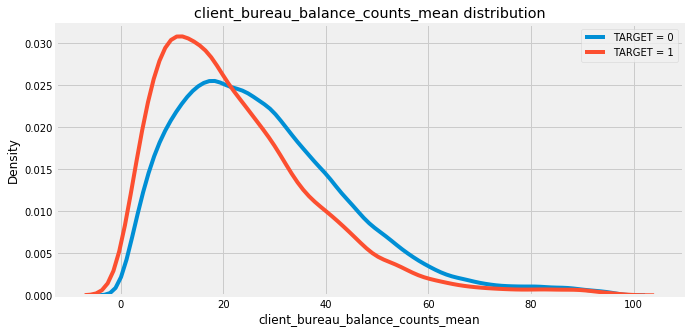

In [57]:
kde_target('client_bureau_balance_counts_mean', df=train)

The correlation between bureau_CREDIT_ACTIVE_Active_count_norm and TARGET: 0.0774
Media value for loan that was repaid: 0.3636
Media value for loan that was NOT repaid: 0.5000


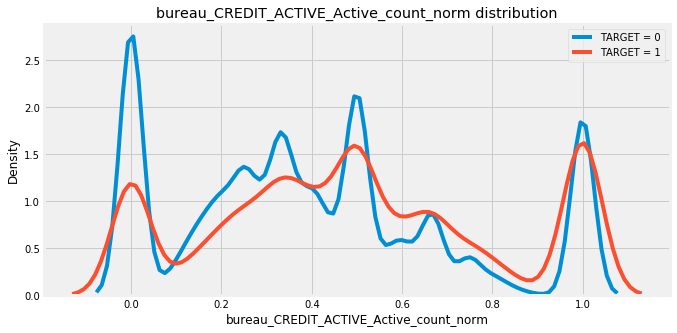

In [58]:
kde_target('bureau_CREDIT_ACTIVE_Active_count_norm', df=train)

##### Collinear Variables

We can calculate not only the correlations of the variables with the taget, but also the correlations of each variable with every other variable ==> we can remove highly collinear variables.

In [59]:
# set the threshold
threshold = 0.8

# empty dictionary to hold correlated variables 
above_threshold_vars = {}

# for each column, record the variables that are above threshold.
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

For each pair of highly correlated variables, we will remove one of the variables.

In [61]:
# tracks columns to be removed and column already examined.
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# iterates through columns and correlated columns
for key, value in above_threshold_vars.items():
    # keep track columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key: next
        else:
            # remove one in the pair only
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
                
cols_to_remove = list(set(cols_to_remove))
print("number of columns to remove: ", len(cols_to_remove))

number of columns to remove:  102


In [63]:
# remove columns from both train / test dataset
train_corrs_removed = train.drop(columns=cols_to_remove)
test_corrs_removed = test.drop(columns=cols_to_remove)

print("Training Corrs Removed Shape: ", train_corrs_removed.shape)
print("Testing Corrs Removed Shape: ", test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 200)
Testing Corrs Removed Shape:  (48744, 199)


In [64]:
# write data into files
train_corrs_removed.to_csv('./data/train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('./data/test_bureau_corrs_removed.csv', index = False)

### Modelling

For all datasets, use the model shown below (with the extract hyperparameters)
- control: only the data in the `application` file
- test one: the data in the `application` files with all data recorded from the `bureau` and `bureau_balance` files.
- test two: the data in the `application` files with all data recorded from the `bureau` and `bureau_balance` files with highly corellated variables removed.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc
import matplotlib.pyplot as plt

In [78]:
def model(features, test_features, encoding='ohe', n_folds=5):
    """
    Train and test a random forest classifiner uisng corss validation
    
    Parameters:
    -----------
        features: (pd.DataFrame)
            dataframe of training features to use for training model. 
            TARGET columns must be included.
        test_features: (pf.DataFrame)
            dataframe of testing features to use for making predictions with model.
        encoding: (str, default='ohe')
            method for encoding categorical variables.
            Either 'ohe' for one-hot encoding or 'le' for integer label encoding 
        n_folds: (int, default=5)
            number of folds used for corss validation.
    
    Returns
    --------
        submission (pd.DataFrame):
            dataframe with 'SK_ID_CURR' and 'TARGET' probabilities predicted by the model.
        feature_importances (pd.DataFrame)
            dataframe with feature importances from the model
        valid_metrics (pd.DataFrame):
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
    """
    # extracts the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # extracts labels for training
    labels = features['TARGET']
    
    # remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])
    
    # one-hot encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # aligns dataframes by columns
        features, test_features = features.align(test_features, join='inner', axis=1)
        
        # no categorical indices to record
        cat_indices = 'auto'
        
    elif encoding == 'le': # integer label encoding
        # create label encoder
        label_encoder = LabelEncoder()
        
        # list for storing categorical indices
        cat_indices = []
        
        # iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # map the categorical features into integer
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                
                # Record the categorical indices
                cat_indices.append(i)
    
    else: # catch error if label encoding schema is not valid
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print("Training data shape: ", features.shape)
    print("Testing data shape: ", test_features.shape)
    
    # extract feature names
    feature_names = list(features.columns)
    
    # convert to np array
    features = np.array(features)
    test_features = np.array(test_features)
    
    # create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=False, random_state=50)
    
    # empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # list for encoding validation and training scores
    valid_scores = []
    train_scores = []
    
    # iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        # training data for the fold 
        train_features, train_label = features[train_indices], labels[train_indices]
        # validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # create the model
        model = RandomForestClassifier(n_estimators=100, random_state=50)
        
        # train the mode;
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # record the best interation
        best_iteration = model.best_iteration_
        
        # records feature importance
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # make prediction
        test_prediction += model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]
        
        # record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # clean up menory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
    
    # make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    
    # overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # add the overall score to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # need for creating dataframe of validation scores
    fold_names = list(range(n_fold))
    fold_names.append("overall")
    
    # dataframes of validation scores
    metrics = pd.DataFrame({
        'fold': fold_names,
        'train': train_scores,
        'valid': valid_scores
    })
    
    return submission, feature_importances, metrics

#### Control

In [76]:
train_control = pd.read_csv('./data/application_train.csv')
test_control = pd.read_csv('./data/application_test.csv')

In [79]:
submission, fi, metrics = model(train_control, test_control)

Training data shape:  (307511, 241)
Testing data shape:  (48744, 241)


TypeError: fit() got an unexpected keyword argument 'eval_metric'